# Customer segmentation By Using K-Means clustering

###  1-Import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import silhouette_score
import joblib
import tkinter as tk
from tkinter import ttk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

###  2- Import data

In [39]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 3- Display basic information about the dataset

In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

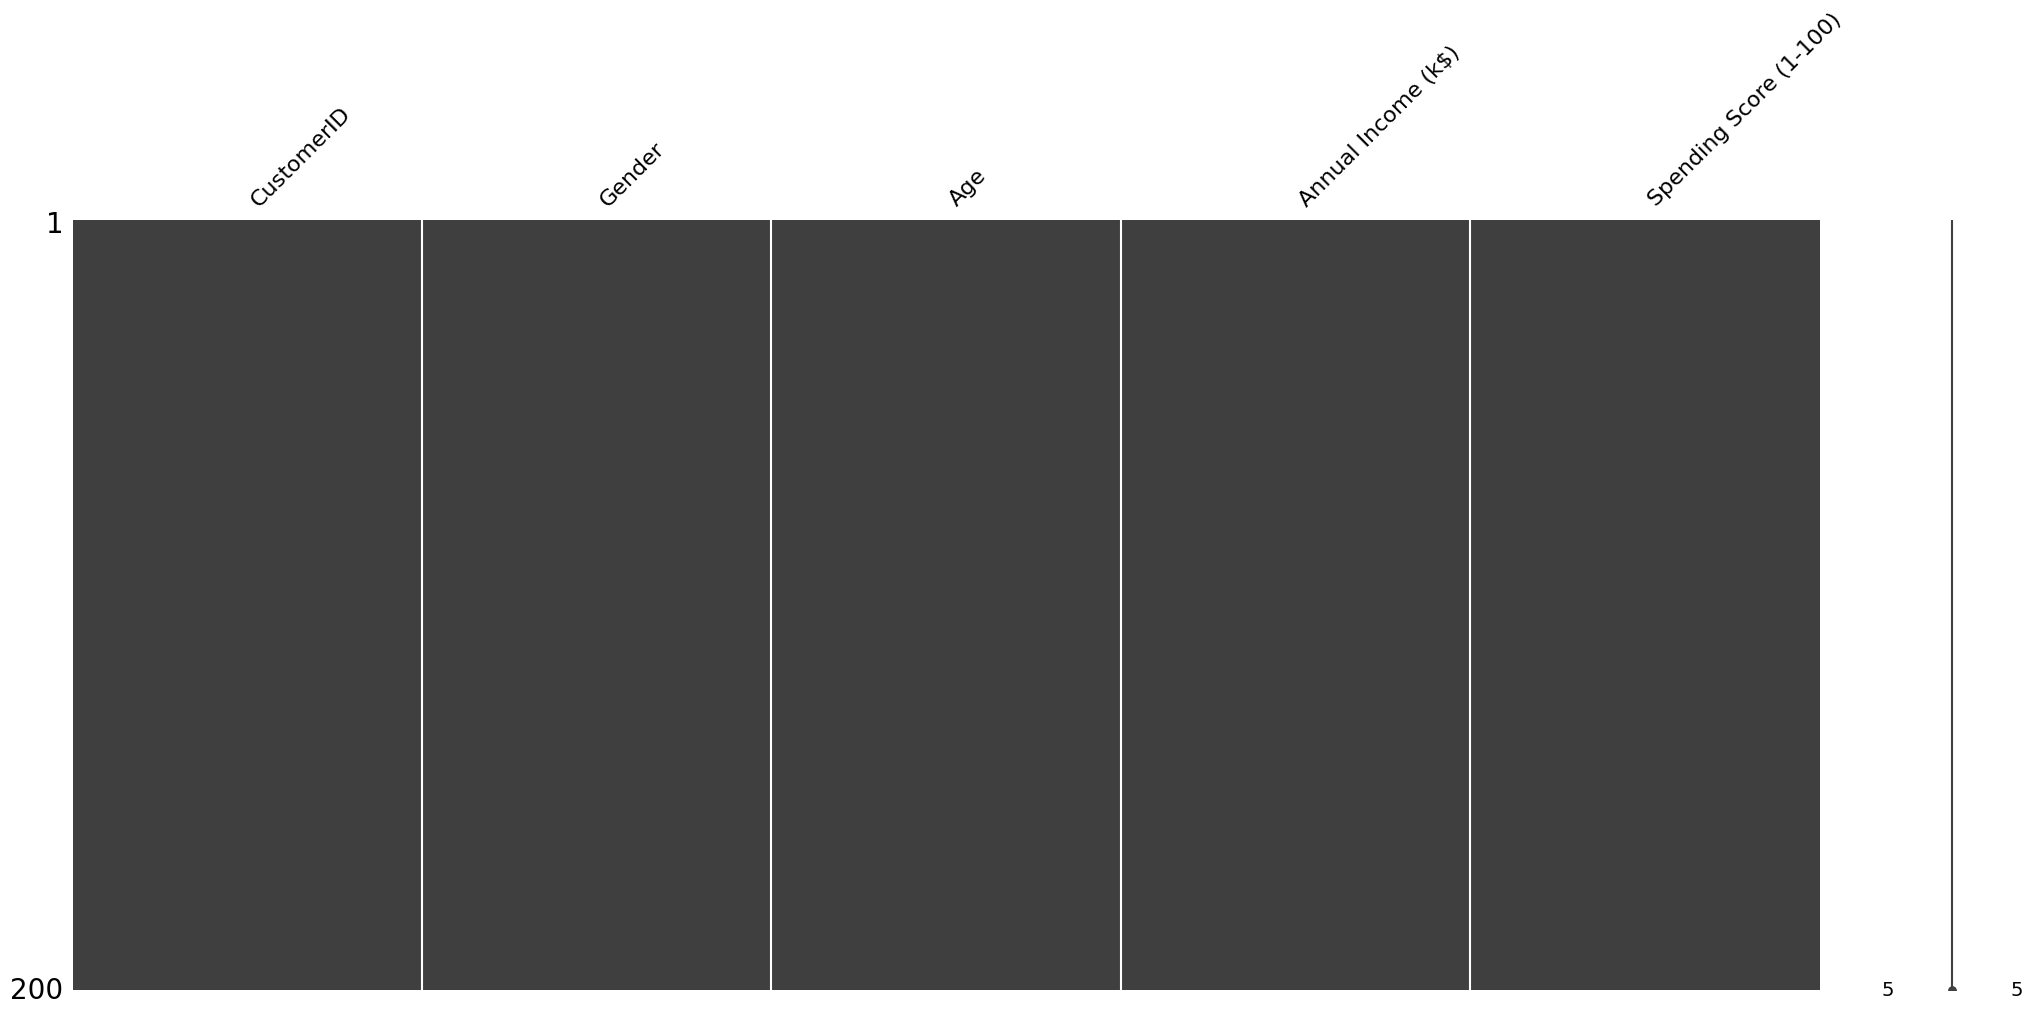

In [7]:
msno.matrix(data)

### 4- data visulaziton and  EDA

In [8]:

data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### 5- Distribution of Age

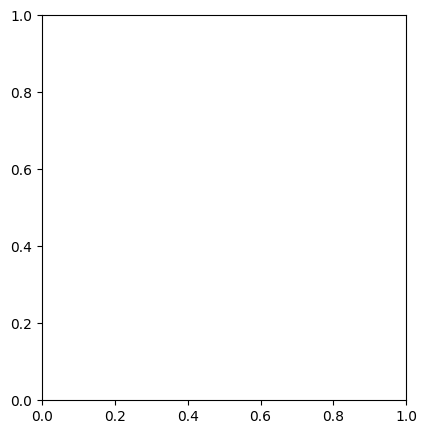

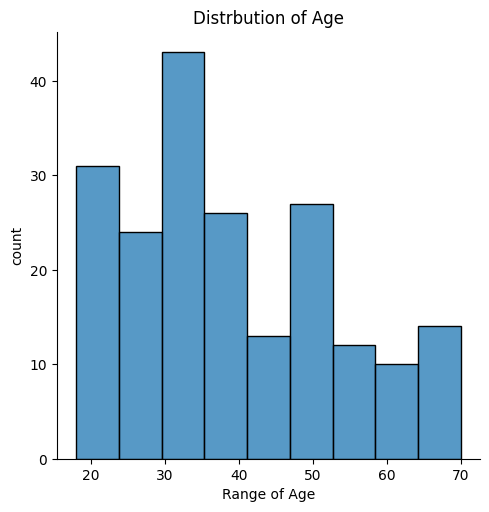

In [9]:
plt.figure(figsize= (16,5))
plt.subplot(1,3,1)
sns.displot(data["Age"])
plt.title("Distrbution of Age")
plt.xlabel("Range of Age")
plt.ylabel("count")
plt.show()


### 6- Distribution of Annual Income

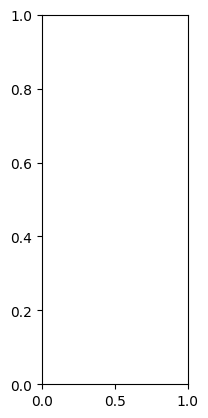

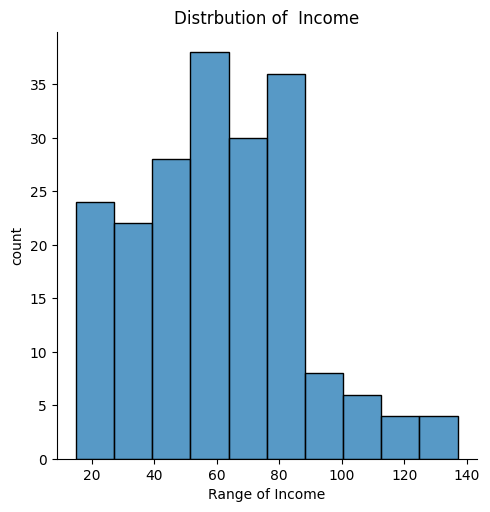

In [10]:

plt.subplot(1,3,2)
sns.displot(data["Annual Income (k$)"])
plt.title("Distrbution of  Income")
plt.xlabel("Range of Income")
plt.ylabel("count")
plt.show()


### 7 - Distribution of Spending Score


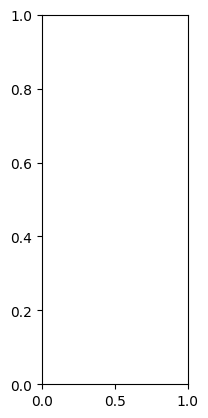

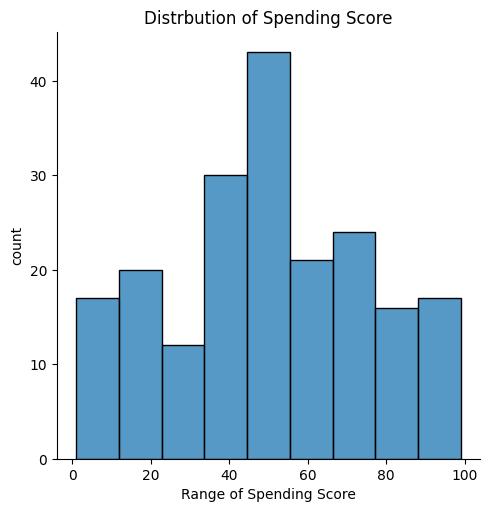

In [11]:

plt.subplot(1,3,3)
sns.displot(data["Spending Score (1-100)"])
plt.title("Distrbution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("count")
plt.show()

### 8 - Percentage of both male and female

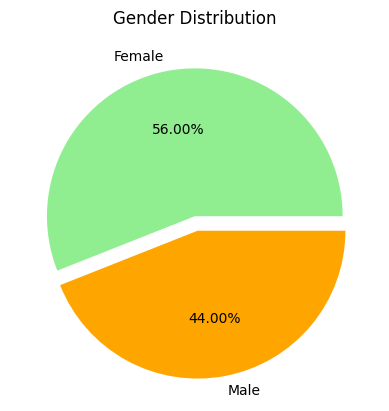

In [12]:
import matplotlib.pyplot as plt

df = data.groupby("Gender").size()

# Plotting the pie chart
fig, ax = plt.subplots()
df.plot(kind='pie', autopct='%1.2f%%', colors=['lightgreen', 'orange'], explode=[0, 0.1], labels=['Female', 'Male'], ax=ax)
ax.set_title("Gender Distribution")
# Removing the y-label
ax.set_ylabel("")
plt.show()


### 9 - Histogram of all numerical columns

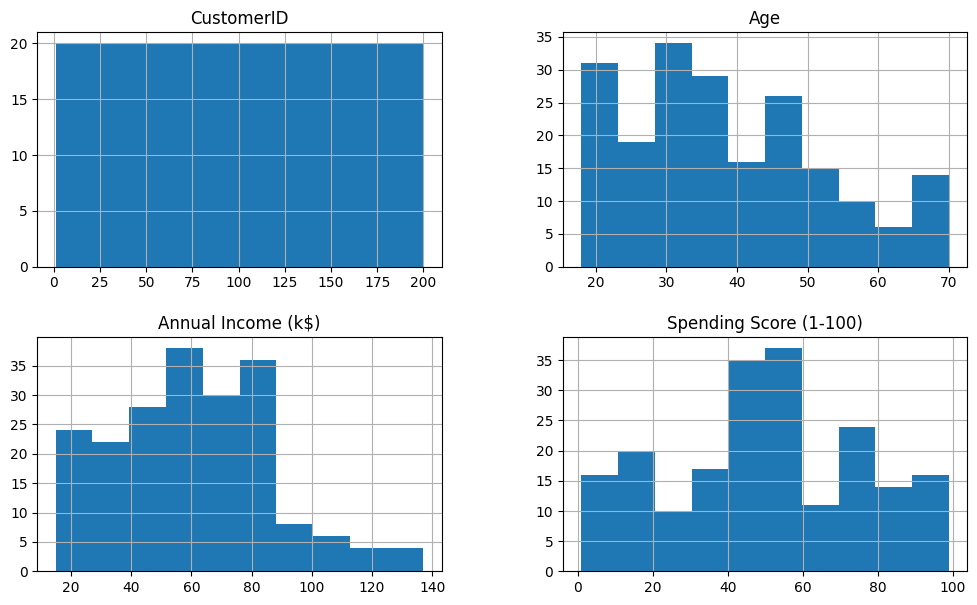

In [13]:
data.hist(figsize = (12,7))
plt.show()

### 10 - Pairplot for exploring relationships

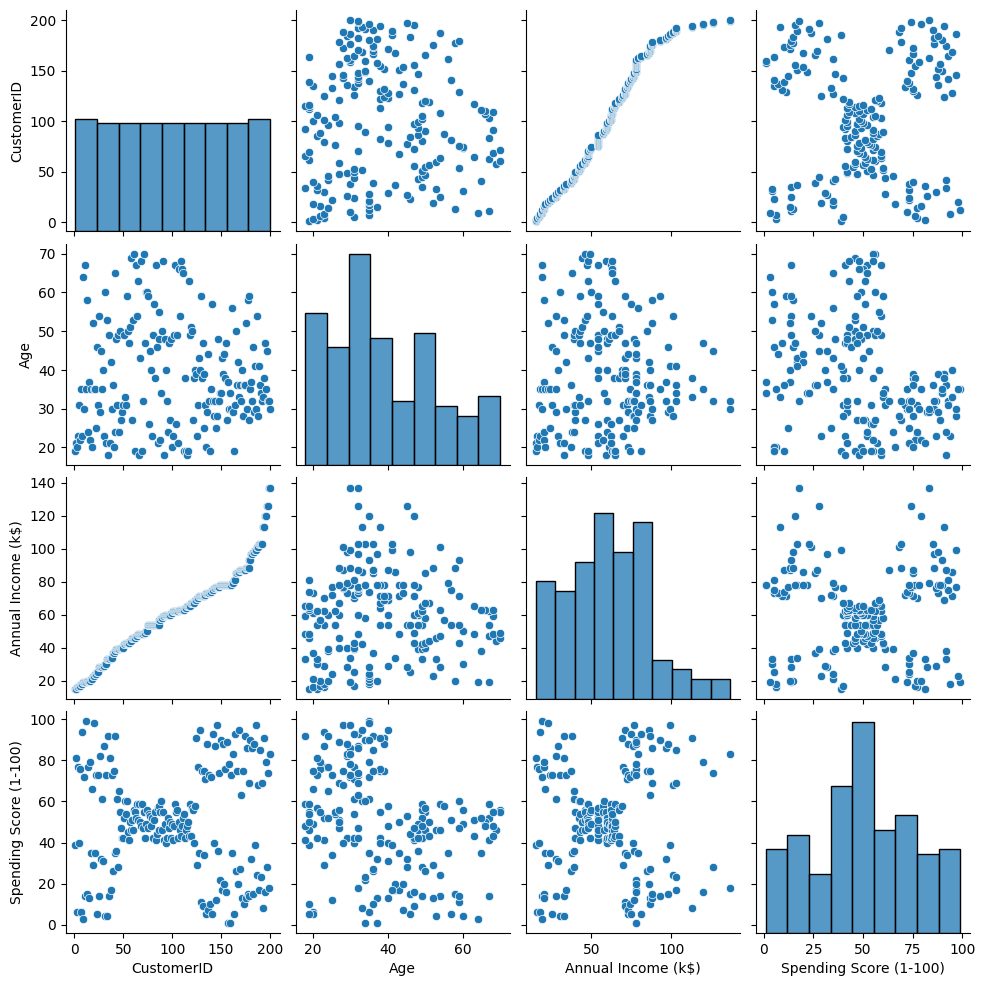

In [14]:
sns.pairplot(data)
plt.show()

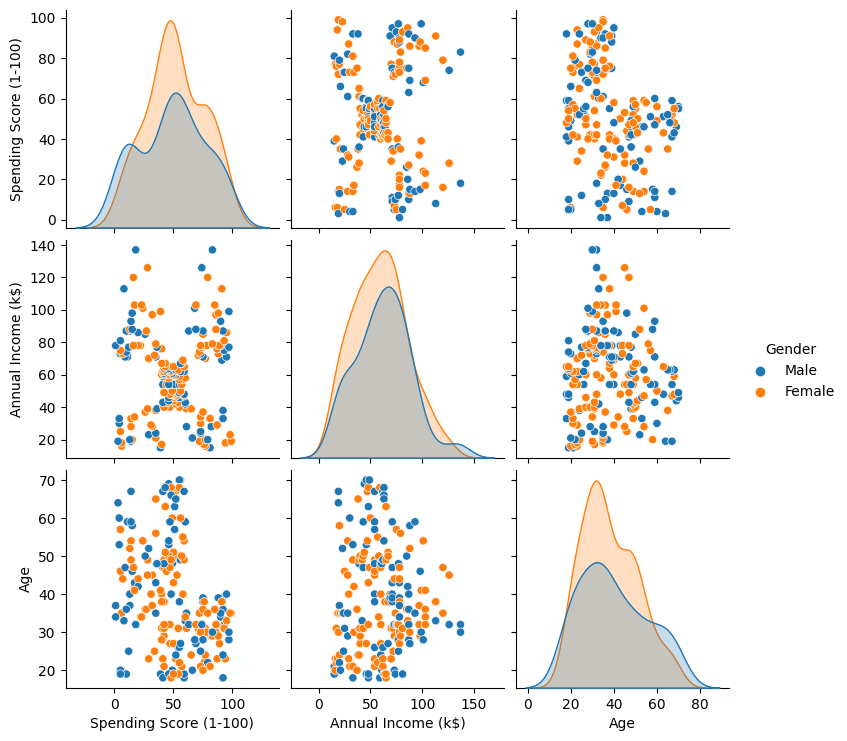

In [15]:
sns.pairplot(data, vars=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue='Gender')
plt.show()

### 11 - Distribution of Age using a bar plot


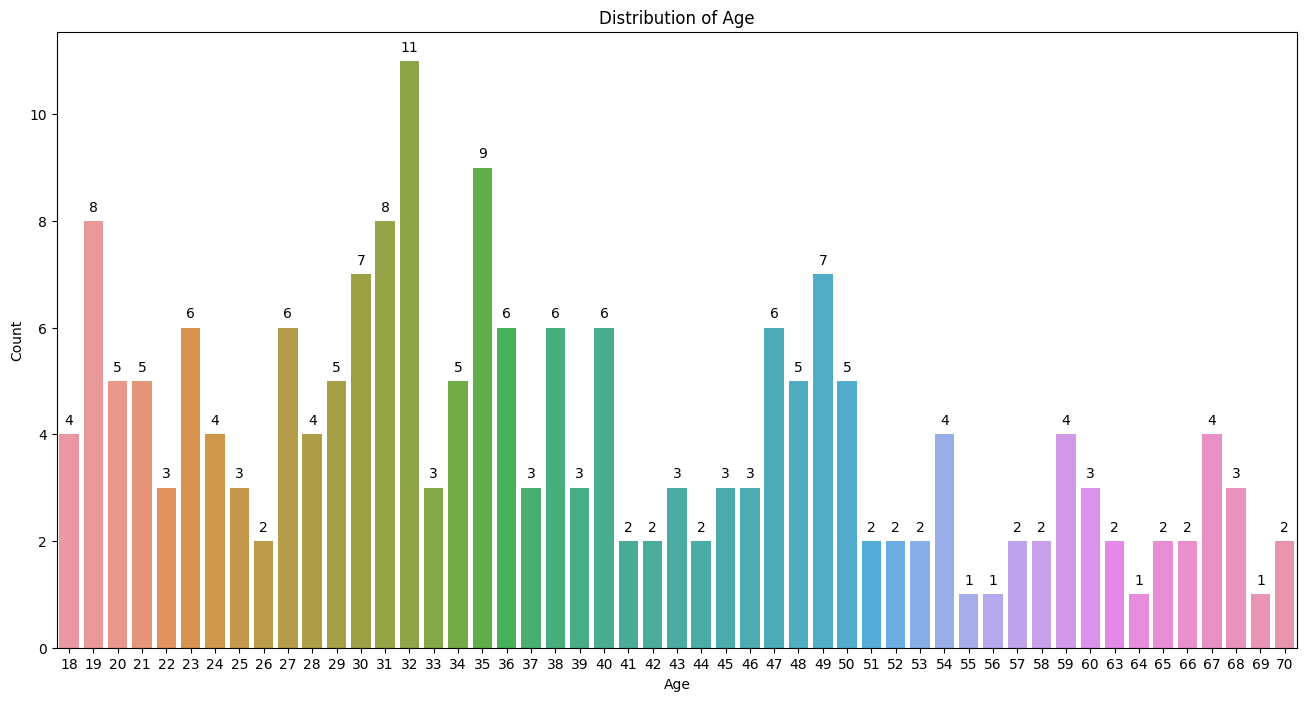

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
ax = sns.barplot(x=data['Age'].value_counts().index, y=data['Age'].value_counts())

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### 12 - Distribution of Annual Income using a bar plot

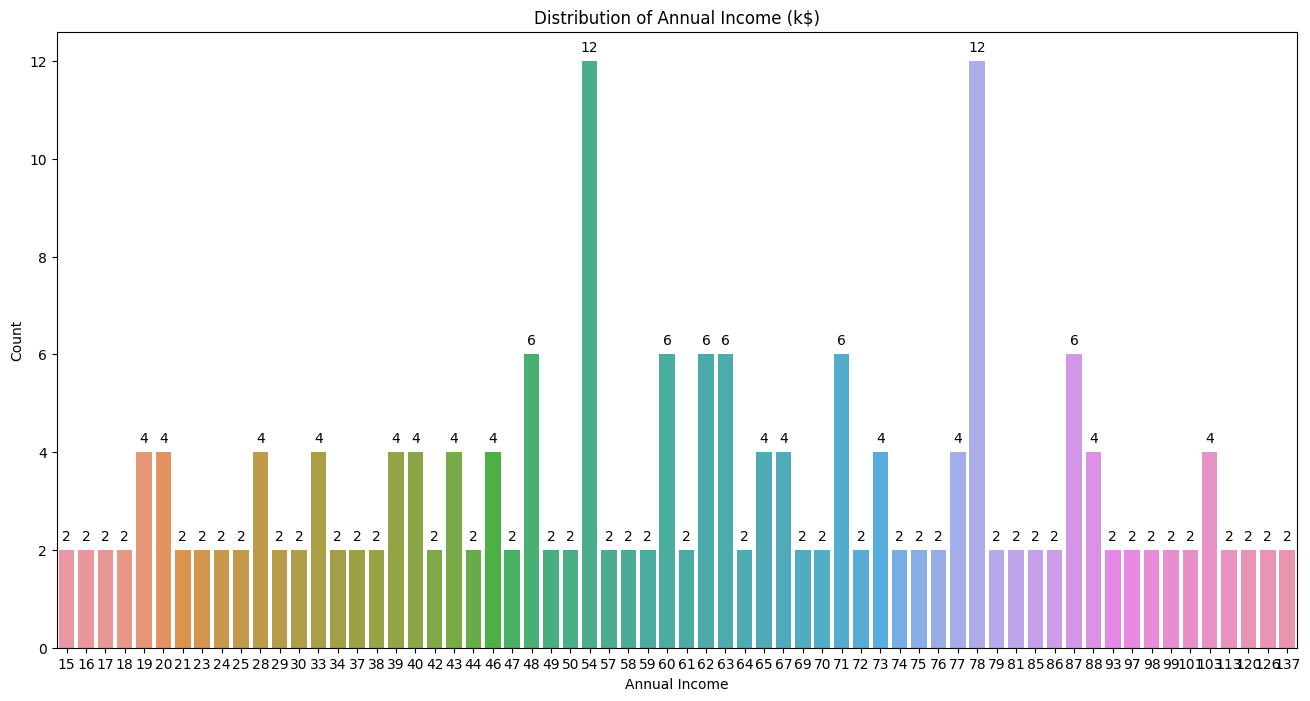

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
ax = sns.barplot(x=data['Annual Income (k$)'].value_counts().index, y=data['Annual Income (k$)'].value_counts())

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()


### 13 - Distribution of Spending Score using a bar plot

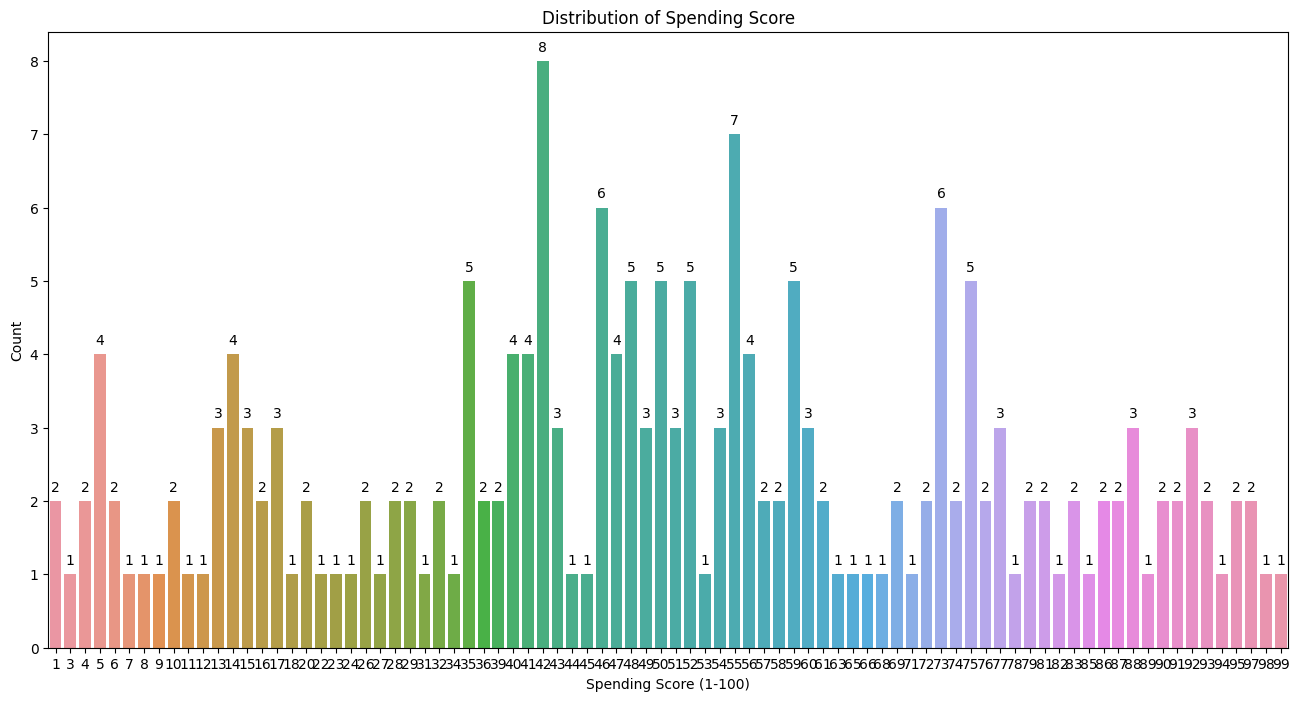

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
ax = sns.barplot(x=data['Spending Score (1-100)'].value_counts().index,
                 y=data['Spending Score (1-100)'].value_counts())

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


### 14 - Automated Data Analysis (dabl)

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=8.72E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

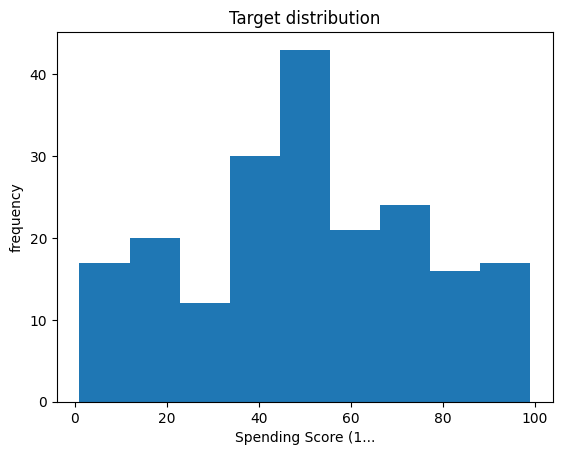

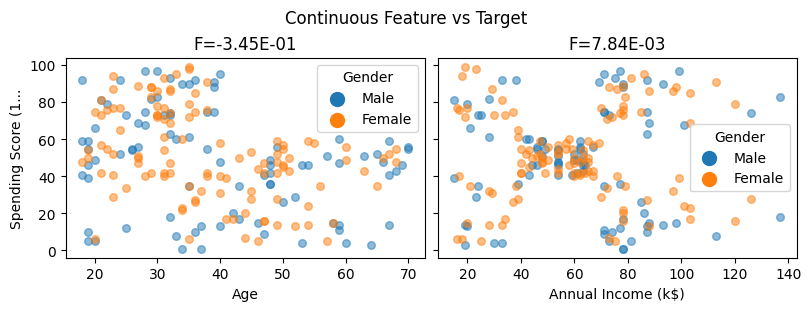

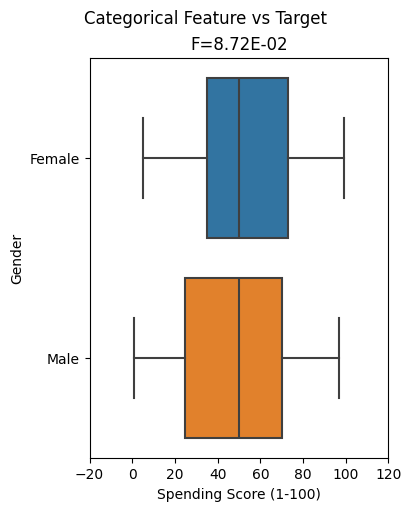

In [19]:
import dabl
dabl.plot(data,target_col = 'Spending Score (1-100)')

### 15 - Correlation Matrix Heatmap

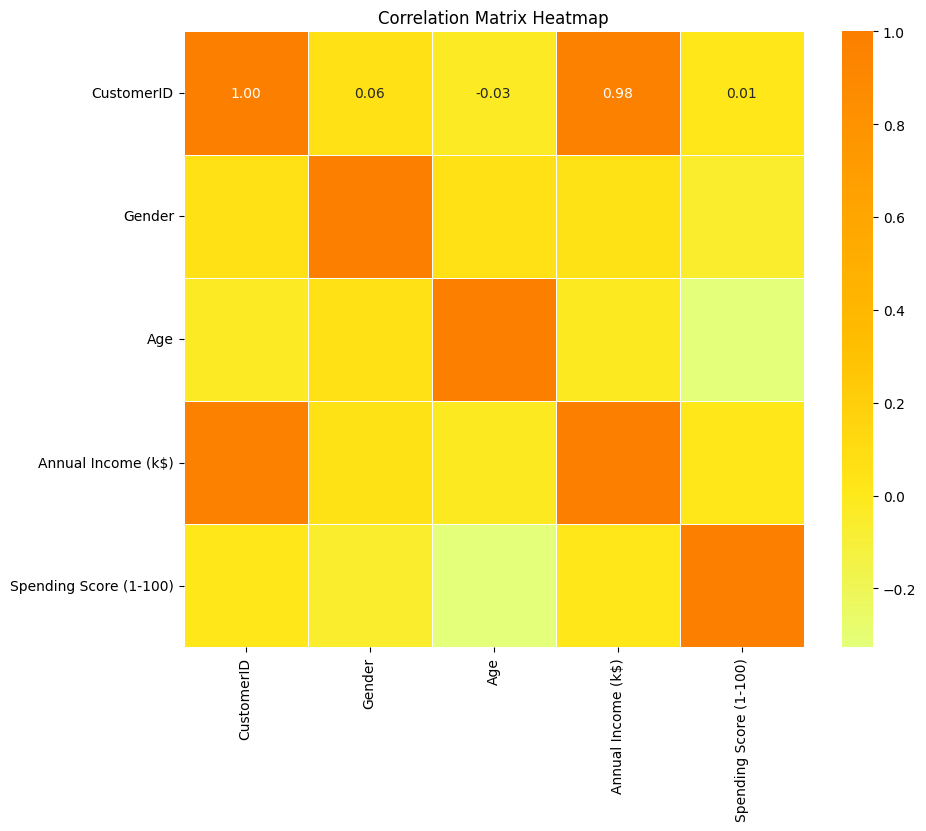

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#'Gender' is a categorical variable
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='Wistia', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### 16 - Scatter plot of Age vs Annual Income

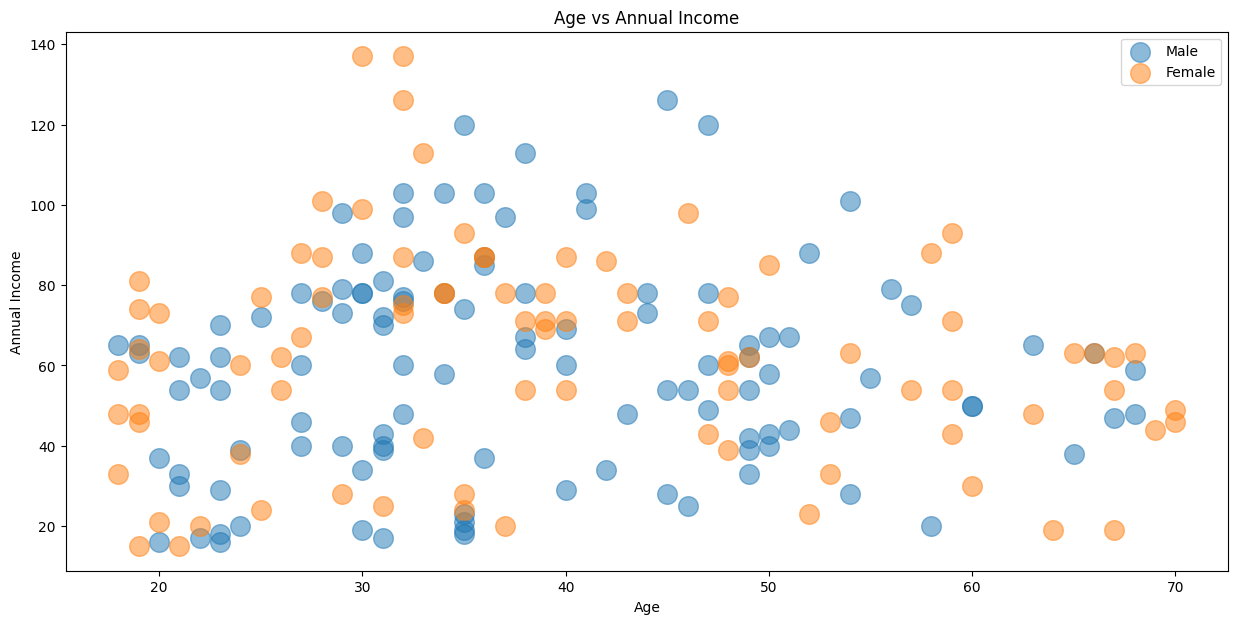

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
# 'Gender' is a categorical variable
data['Gender'] = label_encoder.fit_transform(data['Gender'])

for gender in [0, 1]:  # 0 represents 'Male' and 1 represents 'Female' after label encoding
    plt.scatter(x='Age', y='Annual Income (k$)',
                data=data[data['Gender'] == gender], s=200, alpha=0.5, label=gender)

plt.xlabel("Age")
plt.ylabel('Annual Income')
plt.title("Age vs Annual Income")
plt.legend(labels=['Male', 'Female'])
plt.show()



### 17 - Scatter plot of Annual Income vs Spending Score

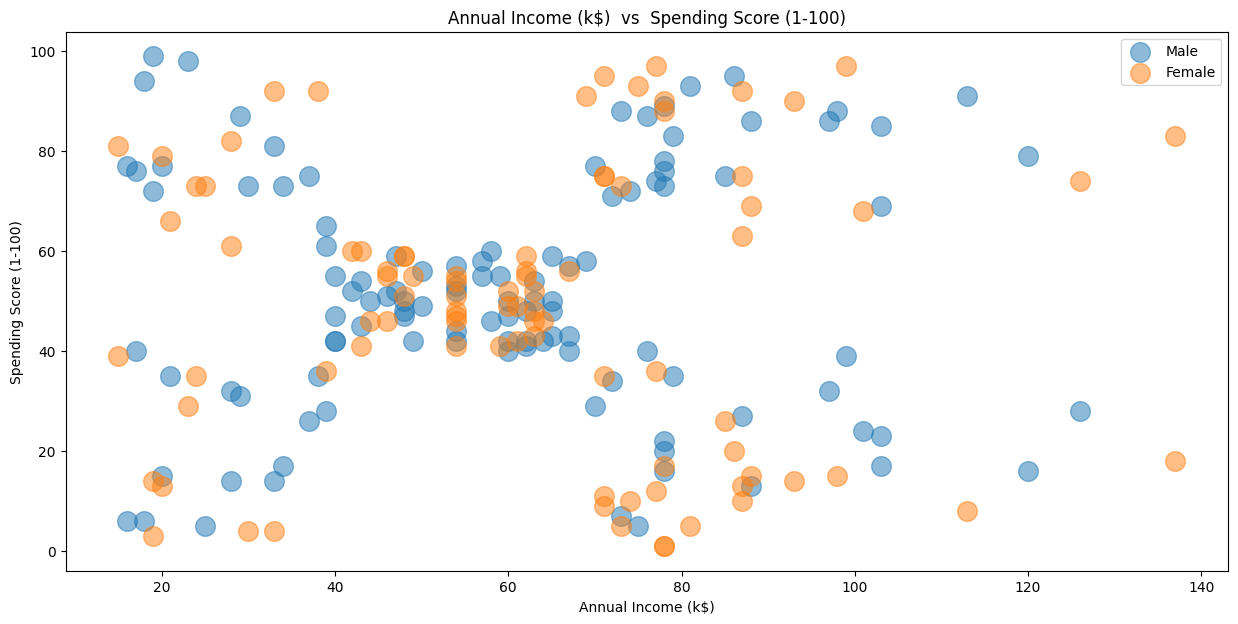

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
# Assuming 'Gender' is a categorical variable
data['Gender'] = label_encoder.fit_transform(data['Gender'])

for gender in [0, 1]:  # 0 represents 'Male' and 1 represents 'Female' after label encoding
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=data[data['Gender'] == gender], s=200, alpha=0.5, label=gender)

plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.title("Annual Income (k$)  vs  Spending Score (1-100)")
plt.legend(labels=['Male', 'Female'])
plt.show()



### 18 -  Feature selection

In [23]:
features = data[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
features

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### 19 - Standardize the features

In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features 

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

###  20 - Apply PCA for feature extraction

In [25]:
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(scaled_features)
data[['PCA1', 'PCA2']] = pca_result
pca_result

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

### 21 - k-means clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [40]:
wcss

[479.3655215855874,
 272.16365088696875,
 187.9072844836425,
 125.49038262266112,
 104.78252712276738,
 86.81765591553363,
 73.99855461879804,
 64.70623303942875,
 57.86226430292432,
 51.894476035572396]

### 22 - Plotting the Elbow Method

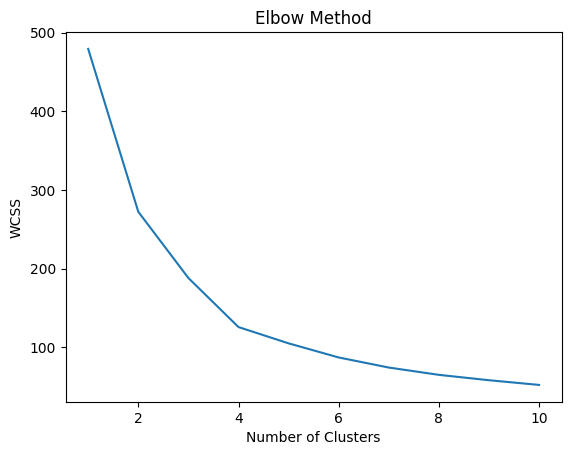

In [29]:
# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

### 23 - Applying K-means with optimal k (4 clusters)

In [30]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(pca_result)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 24 -  Visualizing the clusters

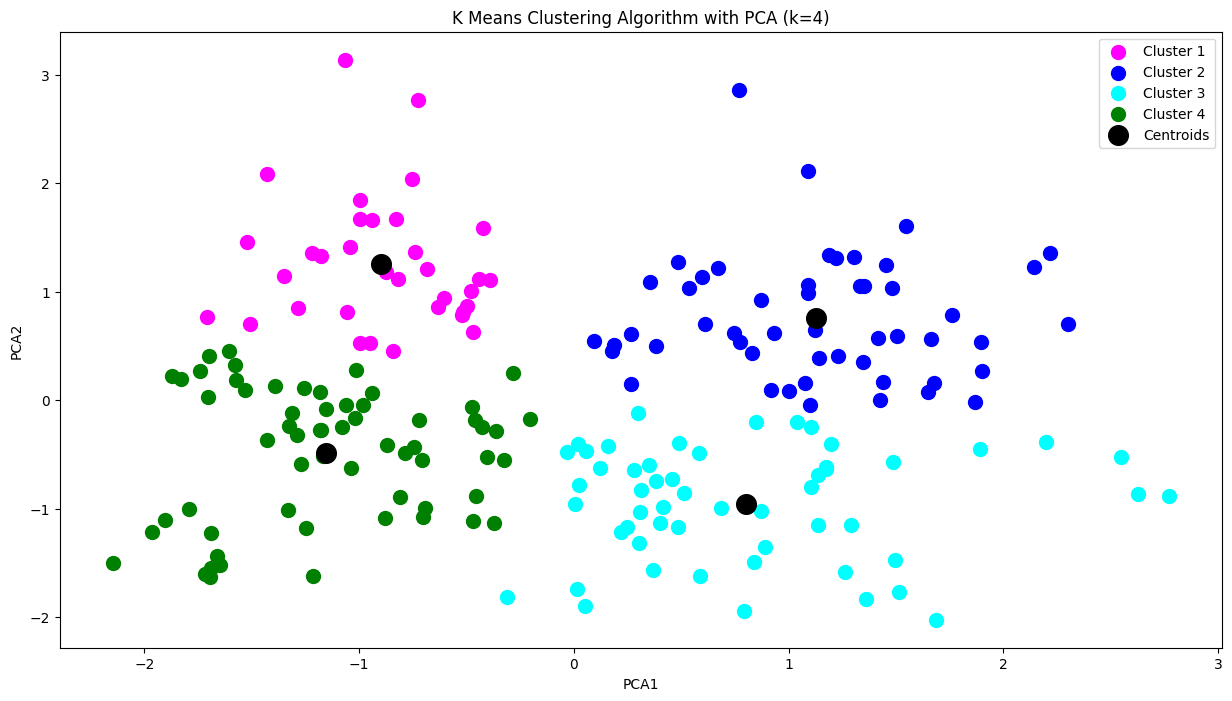

In [31]:
plt.figure(1, figsize=(15, 8))
plt.scatter(data['PCA1'][data['Cluster'] == 0], data['PCA2'][data['Cluster'] == 0], s=100, c='magenta', label='Cluster 1')  # Cluster 1
plt.scatter(data['PCA1'][data['Cluster'] == 1], data['PCA2'][data['Cluster'] == 1], s=100, c='blue', label='Cluster 2')  # Cluster 2
plt.scatter(data['PCA1'][data['Cluster'] == 2], data['PCA2'][data['Cluster'] == 2], s=100, c='cyan', label='Cluster 3')  # Cluster 3
plt.scatter(data['PCA1'][data['Cluster'] == 3], data['PCA2'][data['Cluster'] == 3], s=100, c='green', label='Cluster 4')  # Cluster 4


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('K Means Clustering Algorithm with PCA (k=4)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


### 25- Silhouette Score for K-means Clustering

In [32]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_result, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.41641567781774924


### 28 - Save the Model

In [33]:
# Save the KMeans model
import joblib
joblib.dump(kmeans, 'kmeans_model.joblib')
loaded_kmeans_model = joblib.load('kmeans_model.joblib')
loaded_kmeans_model


KMeans(n_clusters=4, random_state=42)

In [34]:
new_data_point = np.array([[0, 20, 40, 60]])
# Scale the new data point
new_data_point_scaled = scaler.transform(new_data_point)

# Apply PCA to the scaled new data point
new_data_point_pca = pca.transform(new_data_point_scaled)

# Use the loaded KMeans model to predict the cluster for the new data point
new_data_point_cluster = loaded_kmeans_model.predict(new_data_point_pca)

print("Cluster for the new data point:", new_data_point_cluster)


Cluster for the new data point: [3]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
